In [13]:
#Code by David Roberts https://www.kaggle.com/code/davidbroberts/tensorflow-transfer-learning/notebook

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Set the log level to keep the warnings down

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from datasets import MazeDataset
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import torchvision

In [18]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'rectangular_mazes/',
    labels = 'inferred',
    color_mode='grayscale',
    batch_size = 64,
    image_size = (28,28),
    shuffle = True,
    seed = 82
)

Found 1000 files belonging to 1 classes.


In [19]:
torch_ds = MazeDataset(train_ds)
torch_dataloader = DataLoader(torch_ds, batch_size=64, shuffle=True)


In [20]:
for i in tqdm(torch_dataloader):
    print(i, i.shape)
    break

  0%|          | 0/16 [00:00<?, ?it/s]

tensor([[[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [255., 255., 255.,  ..., 255., 255.,   0.],
          [255., 255., 255.,  ..., 255., 255.,   0.],
          ...,
          [  0., 255., 255.,  ..., 255., 255., 255.],
          [  0., 255., 255.,  ..., 255., 255., 255.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]],


        [[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [255., 255., 255.,  ..., 255., 255.,   0.],
          [255., 255., 255.,  ..., 255., 255.,   0.],
          ...,
          [  0., 255., 255.,  ..., 255., 255., 255.],
          [  0., 255., 255.,  ..., 255., 255., 255.],
          [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]],


        [[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [255., 255., 255.,  ..., 255., 255.,   0.],
          [255., 255., 255.,  ..., 255., 255.,   0.],
          ...,
          [  0., 255., 255.,  ..., 255., 255., 255.],
          [  0., 255., 255.,  ..., 255., 255., 255.],
          [  0.,   0.,   0., 

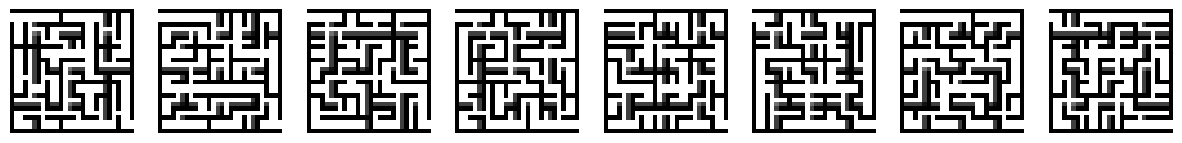

In [23]:
import matplotlib.pyplot as plt

# Eine Funktion, um einige Bilder zu plotten
def show_images(images, n=8):
    plt.figure(figsize=(15, 15))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].permute(1, 2, 0).numpy().astype("uint8"), cmap='gray')
        plt.axis("off")
    plt.show()

# Nehmen Sie einen Batch von Bildern
images = next(iter(torch_dataloader))
show_images(images)